# 쿠버네티스 실습 3 - POD

# 1. Pod 이란?

- Pod(파드)는 쿠버네티스에서 생성하고 관리할 수 있는 배포 가능한 **가장 작은 컴퓨팅 단위**입니다.
    - https://kubernetes.io/ko/docs/concepts/workloads/pods/
- 쿠버네티스는 Pod 단위로 스케줄링, 로드밸런싱, 스케일링 등의 관리 작업을 수행합니다.
    - 쿠버네티스에 어떤 애플리케이션을 배포하고 싶다면 최소 Pod 으로 구성해야 한다는 의미입니다.
- 조금 어렵다면 Pod 은 Container 를 감싼 개념이라고 생각할 수 있습니다.
    - 하나의 Pod 은 한 개의 Container 혹은 여러 개의 Container 로 이루어져있을 수 있습니다.
    - Pod 내부의 여러 Container 는 자원을 공유합니다.
- Pod 의 자세한 구조는 생략하겠습니다.
    - 다만 Pod 은 Stateless 한 특징을 지니고 있으며(특정한 상태를 저장하지 않고), 언제든지 삭제될 수 있는 자원이라는 점을 꼭 기억해주시기 바랍니다.

# 2. Pod 생성

- 간단한 Pod 의 예시입니다.

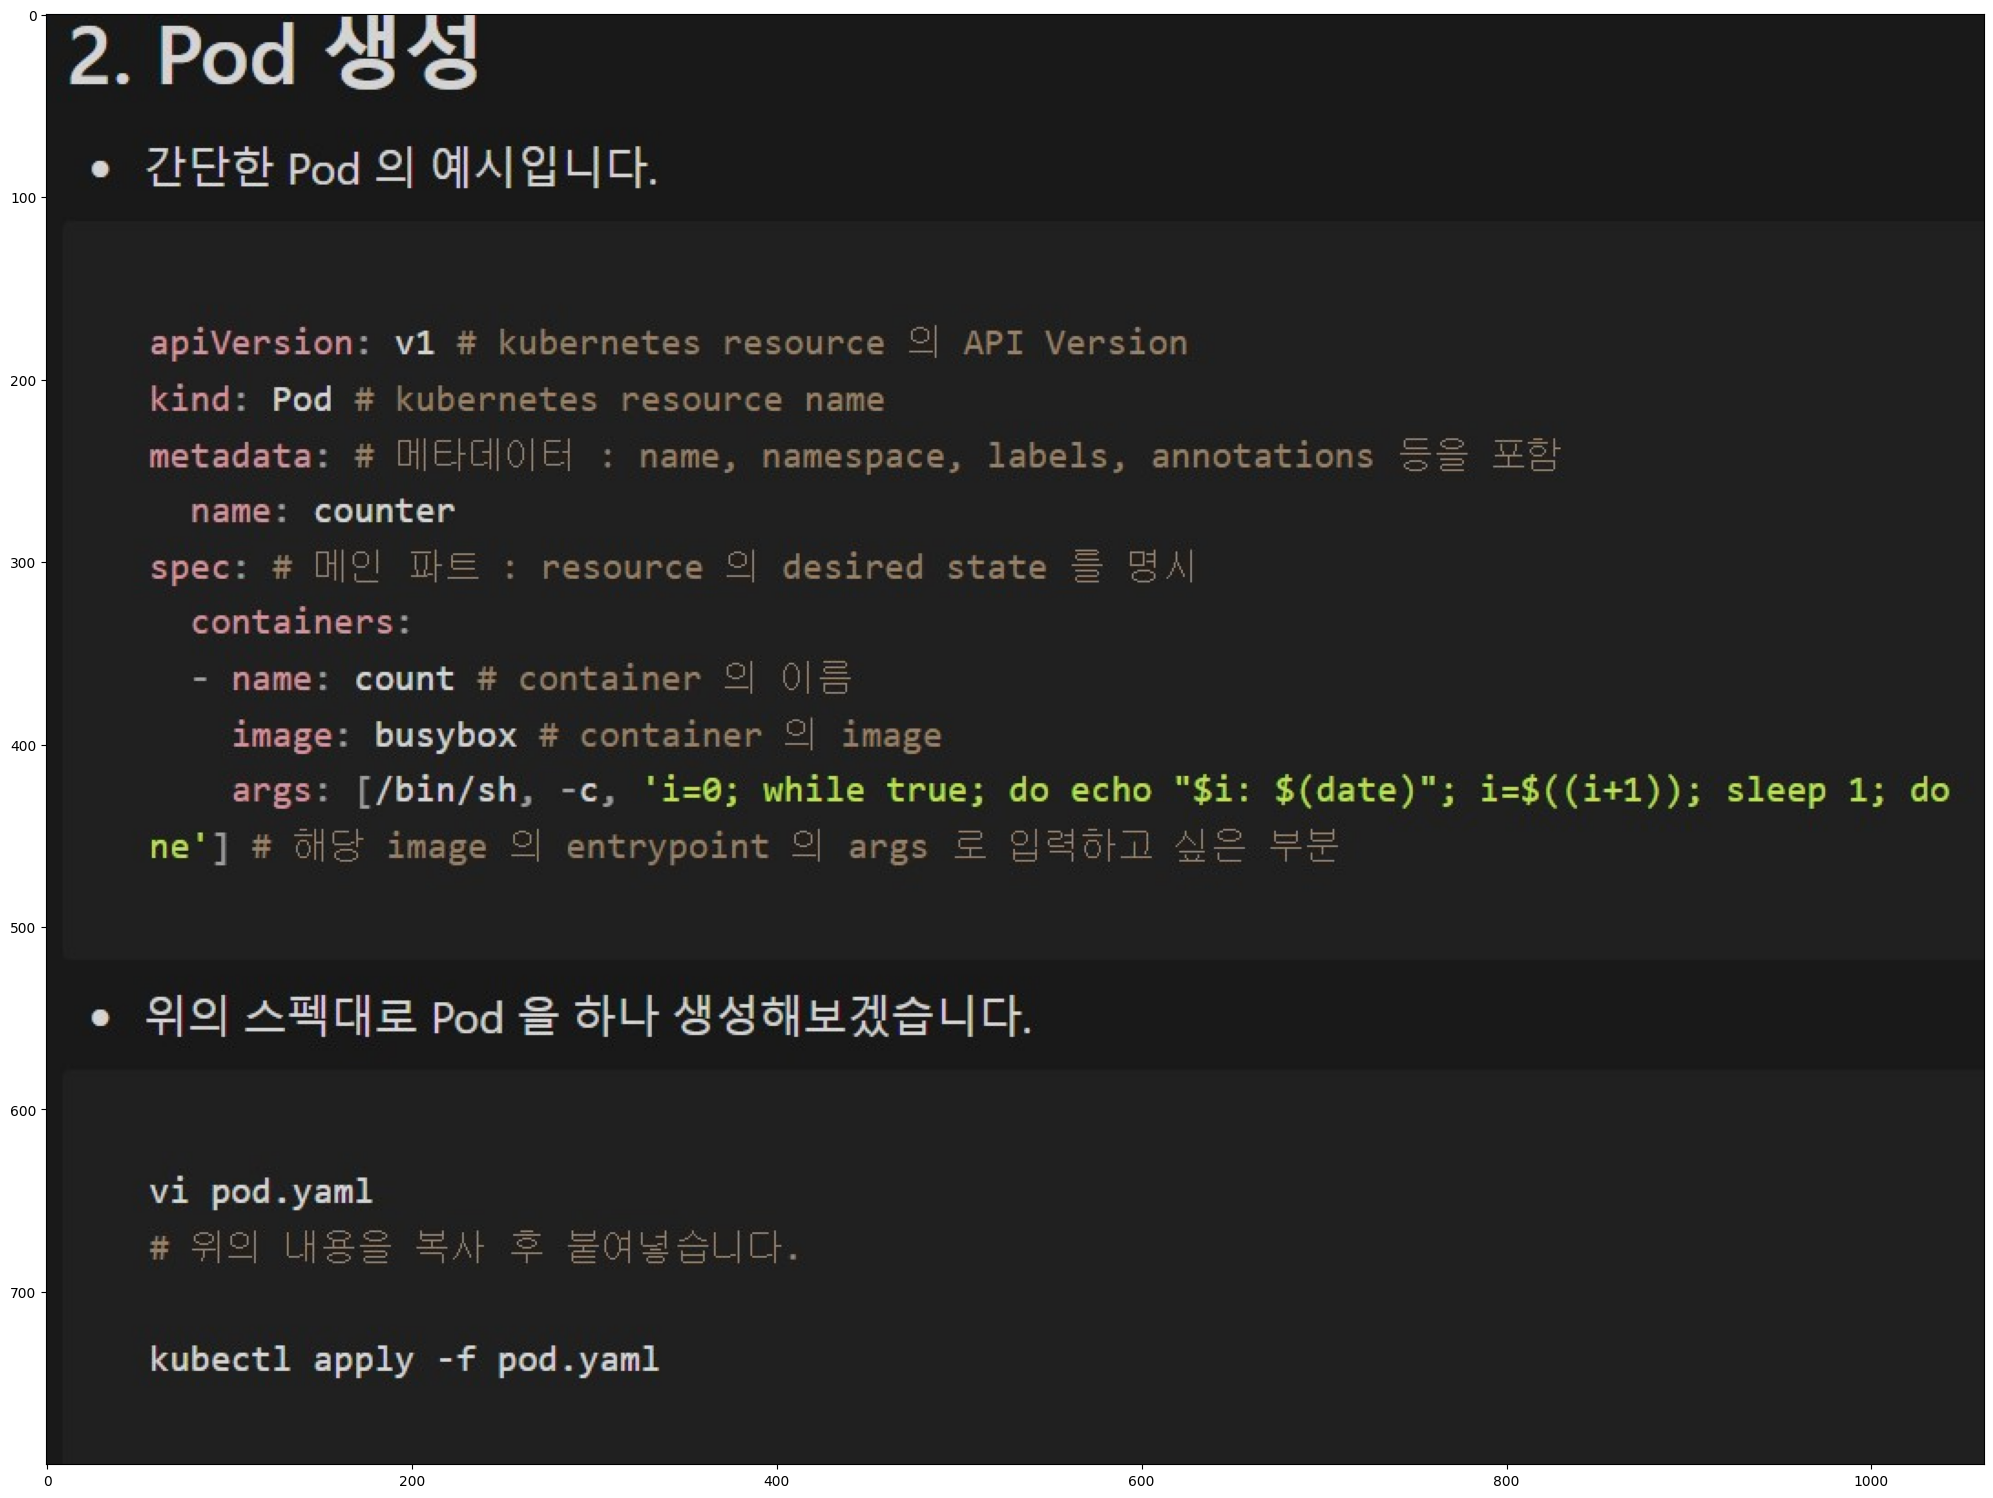

In [1]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt

def display(start, end):
    for i in range(end+1):
        if i > start-1:
            GAP = cv2.imread(f'yaml{i}.jpg')
            GAP = cv2.cvtColor(GAP, cv2.COLOR_BGR2RGB)
            plt.figure(figsize=(25,25))
            plt.imshow(GAP)
            plt.show()

display(start=5, end=5)

In [3]:
# source /mnt/d/ubu/mmlab/bin/activate
# vi pod.yaml
# 미니큐브 시작
!minikube start --driver=docker

😄  minikube v1.22.0 on Ubuntu 20.04 (amd64)
✨  Using the docker driver based on user configuration
👍  Starting control plane node minikube in cluster minikube
🚜  Pulling base image ...
🔥  Creating docker container (CPUs=2, Memory=8000MB) ...
🐳  Preparing Kubernetes v1.21.2 on Docker 20.10.7 ...
    ▪ Generating certificates and keys ...
    ▪ Booting up control plane ...
    ▪ Configuring RBAC rules ...
🔎  Verifying Kubernetes components...
    ▪ Using image gcr.io/k8s-minikube/storage-provisioner:v5
🌟  Enabled addons: storage-provisioner, default-storageclass
🏄  Done! kubectl is now configured to use "minikube" cluster and "default" namespace by default


In [5]:
!kubectl apply -f pod.yaml 

pod/counter unchanged


- `kubectl apply -f <yaml-file-path>` 를 수행하면, `<yaml-file-path>` 에 해당하는 kubernetes resource 를 생성 또는 변경 할 수 있습니다.
    - kubernetes resource 의 desired state 를 기록해놓기 위해 항상 YAML 파일을 저장하고, 버전 관리하는 것을 권장합니다.
    - `kubectl run` 명령어로 YAML 파일 생성 없이 pod 을 생성할 수도 있지만, 이는 kubernetes 에서 권장하는 방식이 아니므로 생략하겠습니다.
- 생성한 Pod 의 상태를 확인합니다.

In [7]:
!kubectl get pod

# kubectl get pod
# # ContainerCreating

# kubectl get pod
# # 시간이 지난 후 Running 으로 변하는 것을 확인할 수 있습니다.

NAME      READY   STATUS    RESTARTS   AGE
counter   1/1     Running   0          4m44s


# 3. Pod 조회 : kubectl get pod

- 방금 current namespace 의 Pod 목록을 조회하는 명령을 수행하였습니다.
    - 조회 결과는 Desired state 가 아닌, **Current State** 를 출력합니다.

- **namespace** 란 ?
    - namespace 는 kubernetes 에서 리소스를 격리하는 가상의(논리적인) 단위
    - `kubectl config view --minify | grep namespace:` 로 current namespace 가 어떤 namespace 로 설정되었는지 확인할 수 있습니다.
        - 따로 설정하지 않았다면 `default` namespace 가 기본으로 설정되어 있을 것입니다.

- 특정 namespace 혹은 모든 namespace 의 pod 을 조회할 수도 있습니다.

In [13]:
!kubectl config view --minify | grep namespace:

    namespace: default


In [11]:
!kubectl get pod -n kube-system
# kube-system namespace 의 pod 을 조회합니다.

NAME                               READY   STATUS    RESTARTS   AGE
coredns-558bd4d5db-gwsk7           1/1     Running   0          12m
etcd-minikube                      1/1     Running   0          12m
kube-apiserver-minikube            1/1     Running   0          12m
kube-controller-manager-minikube   1/1     Running   0          12m
kube-proxy-lnm47                   1/1     Running   0          12m
kube-scheduler-minikube            1/1     Running   0          12m
storage-provisioner                1/1     Running   0          12m


In [12]:
!kubectl get pod -A
# 모든 namespace 의 pod 을 조회합니다.

NAMESPACE     NAME                               READY   STATUS    RESTARTS   AGE
default       counter                            1/1     Running   0          12m
kube-system   coredns-558bd4d5db-gwsk7           1/1     Running   0          12m
kube-system   etcd-minikube                      1/1     Running   0          12m
kube-system   kube-apiserver-minikube            1/1     Running   0          13m
kube-system   kube-controller-manager-minikube   1/1     Running   0          12m
kube-system   kube-proxy-lnm47                   1/1     Running   0          12m
kube-system   kube-scheduler-minikube            1/1     Running   0          12m
kube-system   storage-provisioner                1/1     Running   0          12m


- pod 하나를 조회하는 명령어는 다음과 같습니다.
    - `<pod-name>` 에 해당하는 pod 을 조회합니다. - NAME 말함

In [18]:
!kubectl get pod counter

NAME      READY   STATUS    RESTARTS   AGE
counter   1/1     Running   0          22m


- pod 하나를 조금 더 자세히 조회하는 명령어는 다음과 같습니다.
    - `<pod-name>` 에 해당하는 pod 을 자세히 조회합니다.

In [19]:
# !kubectl describe --help
!kubectl describe pod counter

Name:         counter
Namespace:    default
Priority:     0
Node:         minikube/192.168.49.2
Start Time:   Sun, 18 Jun 2023 02:36:08 +0900
Labels:       <none>
Annotations:  <none>
Status:       Running
IP:           172.17.0.3
IPs:
  IP:  172.17.0.3
Containers:
  count:
    Container ID:  docker://03f065fee0d60833b42c8b4407e6700941318d9c2d943bf519a84be94f42a664
    Image:         busybox
    Image ID:      docker-pullable://busybox@sha256:6e494387c901caf429c1bf77bd92fb82b33a68c0e19f6d1aa6a3ac8d27a7049d
    Port:          <none>
    Host Port:     <none>
    Args:
      /bin/sh
      -c
      i=0; while true; do echo "$i: $(date)"; i=$((i+1)); sleep 1; done
    State:          Running
      Started:      Sun, 18 Jun 2023 02:36:17 +0900
    Ready:          True
    Restart Count:  0
    Environment:    <none>
    Mounts:
      /var/run/secrets/kubernetes.io/serviceaccount from kube-api-access-tvcln (ro)
Conditions:
  Type              Status
  Initialized       True 
  Ready         

- 기타 유용한 명령을 소개드리겠습니다.

In [20]:
!kubectl get pod -o wide
# pod 목록을 보다 자세히 출력합니다.



NAME      READY   STATUS    RESTARTS   AGE   IP           NODE       NOMINATED NODE   READINESS GATES
counter   1/1     Running   0          28m   172.17.0.3   minikube   <none>           <none>


In [22]:
!kubectl get pod counter -o yaml
# # <pod-name> 을 yaml 형식으로 출력합니다.

apiVersion: v1
kind: Pod
metadata:
  annotations:
    kubectl.kubernetes.io/last-applied-configuration: |
      {"apiVersion":"v1","kind":"Pod","metadata":{"annotations":{},"name":"counter","namespace":"default"},"spec":{"containers":[{"args":["/bin/sh","-c","i=0; while true; do echo \"$i: $(date)\"; i=$((i+1)); sleep 1; done"],"image":"busybox","name":"count"}]}}
  creationTimestamp: "2023-06-17T17:36:08Z"
  name: counter
  namespace: default
  resourceVersion: "516"
  uid: 79024c54-34cd-43c8-a163-7c8199e523d7
spec:
  containers:
  - args:
    - /bin/sh
    - -c
    - 'i=0; while true; do echo "$i: $(date)"; i=$((i+1)); sleep 1; done'
    image: busybox
    imagePullPolicy: Always
    name: count
    resources: {}
    terminationMessagePath: /dev/termination-log
    terminationMessagePolicy: File
    volumeMounts:
    - mountPath: /var/run/secrets/kubernetes.io/serviceaccount
      name: kube-api-access-tvcln
      readOnly: true
  dnsPolicy: ClusterFirst
  enableServiceLinks: true
  

In [23]:
!kubectl get pod -w
# kubectl get pod 의 결과를 계속 보여주며, 변화가 있을 때만 업데이트됩니다.

NAME      READY   STATUS    RESTARTS   AGE
counter   1/1     Running   0          29m
^C


# 4. Pod 로그

- pod 의 로그를 확인하는 명령어는 다음과 같습니다.
- `kubectl logs <pod-name>`

- `kubectl logs <pod-name> -f`
#### <pod-name> 의 로그를 계속 보여줍니다.

In [25]:
!kubectl logs counter

0: Sat Jun 17 17:36:16 UTC 2023
1: Sat Jun 17 17:36:17 UTC 2023
2: Sat Jun 17 17:36:18 UTC 2023
3: Sat Jun 17 17:36:19 UTC 2023
4: Sat Jun 17 17:36:21 UTC 2023
5: Sat Jun 17 17:36:22 UTC 2023
6: Sat Jun 17 17:36:23 UTC 2023
7: Sat Jun 17 17:36:23 UTC 2023
8: Sat Jun 17 17:36:25 UTC 2023
9: Sat Jun 17 17:36:26 UTC 2023
10: Sat Jun 17 17:36:27 UTC 2023
11: Sat Jun 17 17:36:28 UTC 2023
12: Sat Jun 17 17:36:29 UTC 2023
13: Sat Jun 17 17:36:30 UTC 2023
14: Sat Jun 17 17:36:31 UTC 2023
15: Sat Jun 17 17:36:32 UTC 2023
16: Sat Jun 17 17:36:33 UTC 2023
17: Sat Jun 17 17:36:34 UTC 2023
18: Sat Jun 17 17:36:35 UTC 2023
19: Sat Jun 17 17:36:36 UTC 2023
20: Sat Jun 17 17:36:37 UTC 2023
21: Sat Jun 17 17:36:38 UTC 2023
22: Sat Jun 17 17:36:39 UTC 2023
23: Sat Jun 17 17:36:40 UTC 2023
24: Sat Jun 17 17:36:41 UTC 2023
25: Sat Jun 17 17:36:42 UTC 2023
26: Sat Jun 17 17:36:43 UTC 2023
27: Sat Jun 17 17:36:44 UTC 2023
28: Sat Jun 17 17:36:45 UTC 2023
29: Sat Jun 17 17:36:46 UTC 2023
30: Sat Jun 17 17:36

- pod 안에 여러 개의 container 가 있는 경우에는 다음과 같습니다.

- `kubectl logs <pod-name> -c <container-name>`

- `kubectl logs <pod-name> -c <container-name> -f`

In [26]:
!kubectl exec --help

Execute a command in a container.

Examples:
  # Get output from running the 'date' command from pod mypod, using the first
container by default
  kubectl exec mypod -- date
  
  # Get output from running the 'date' command in ruby-container from pod mypod
  kubectl exec mypod -c ruby-container -- date
  
  # Switch to raw terminal mode; sends stdin to 'bash' in ruby-container from
pod mypod
  # and sends stdout/stderr from 'bash' back to the client
  kubectl exec mypod -c ruby-container -i -t -- bash -il
  
  # List contents of /usr from the first container of pod mypod and sort by
modification time
  # If the command you want to execute in the pod has any flags in common (e.g.
-i),
  # you must use two dashes (--) to separate your command's flags/arguments
  # Also note, do not surround your command and its flags/arguments with quotes
  # unless that is how you would execute it normally (i.e., do ls -t /usr, not
"ls -t /usr")
  kubectl exec mypod -i -t -- ls -t /usr
  
  # Get output

- sh 명령어를 counter라는 pod에서 수행한 효과가 남
- `kubectl exec -it <pod-name> -- <명령어>`

In [33]:
!kubectl exec -it counter -- sh

/ # 
/ # ^C

/ # 
/ # 

pod 안에 여러 개의 container 가 있는 경우에는 다음과 같습니다.
- `kubectl exec -it <pod-name> -c <container-name> -- <명령어>`
- docker exec 과 비슷한 명령임을 확인할 수 있습니다.

# 6. Pod 삭제

- pod 을 삭제하는 명령어는 다음과 같습니다.
- `kubectl delete pod <pod-name>`

In [34]:
!kubectl delete pod counter

pod "counter" deleted


In [35]:
!kubectl get pod

No resources found in default namespace.


- 혹은 다음과 같이 리소스를 생성할 때, 사용한 YAML 파일을 사용해서 삭제할 수도 있습니다.
- `kubectl delete -f <YAML-파일-경로>`

In [36]:
!kubectl delete -f pod.yaml

Error from server (NotFound): error when deleting "pod.yaml": pods "counter" not found
